# Predictive Analysis using Machine Learning
We aim to predict the Min, Max and Modal prices of a given commodity based on the various features provided in the dataset like Arrivals, Grade, Variety, Year, Month and Date. 

## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# sklearn regression models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

import pickle

## Load Preprocessed Data

In [2]:
# load data
bengaluru_df = pd.read_csv('preprocessed_krama_report_bengaluru.csv')
bengaluru_df.head()

,Min,Max,Modal,Year,Month,Day,Variety_BELLARY RED,Variety_LOCAL,Variety_ONION,Variety_OTHER,Variety_PUNA,Grade_FAQ,Grade_LARGE,Grade_MEDIUM,Grade_SMALL
0,260.0,360.0,310.0,2002.0,2.0,7.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,150.0,240.0,195.0,2002.0,2.0,7.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,170.0,280.0,225.0,2002.0,3.0,27.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,190.0,300.0,245.0,2002.0,3.0,28.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,180.0,280.0,230.0,2002.0,3.0,30.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


## Test-Train Split

In [3]:
# Test-training split
X = bengaluru_df.drop(['Min', 'Max', 'Modal'], axis=1)
Y = bengaluru_df[['Min', 'Max', 'Modal']]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((13034, 12), (3259, 12), (13034, 3), (3259, 3))

## Model Building

Training Linear Regression...
Training Random Forest...
Training Support Vector Machine...
Training K-Nearest Neighbors...
Linear Regression - Min MSE: 280196.4690878787, Max MSE: 386469.4661020906, Modal MSE: 266548.9352044483
Linear Regression - Average MSE: 311071.6234648059
Random Forest - Min MSE: 81726.61641497393, Max MSE: 80814.31819466094, Modal MSE: 13180.268977109543
Random Forest - Average MSE: 58573.7345289148
Support Vector Machine - Min MSE: 347782.74616955454, Max MSE: 717567.8802903095, Modal MSE: 472571.4560361478
Support Vector Machine - Average MSE: 512640.6941653372
K-Nearest Neighbors - Min MSE: 163000.71907947224, Max MSE: 225897.1066216631, Modal MSE: 126201.94810678122
K-Nearest Neighbors - Average MSE: 171699.92460263884


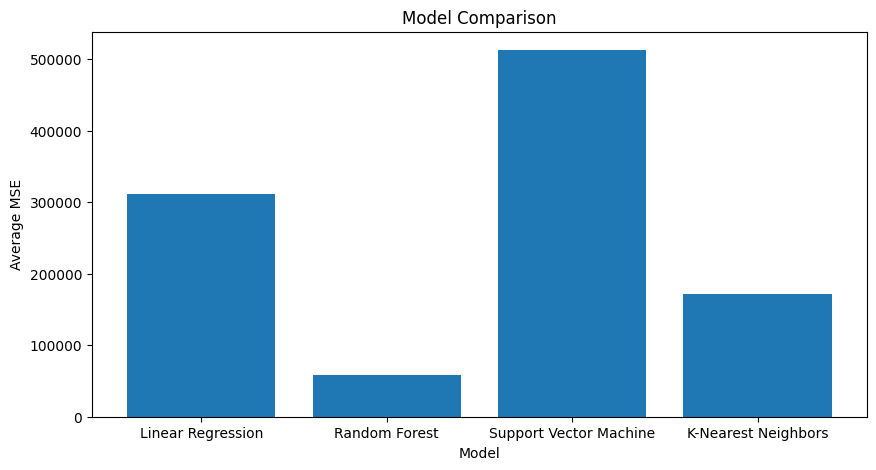

In [4]:
# Model Training
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Machine': SVR(),
    # 'Decision Tree': DecisionTreeRegressor(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    # 'Gradient Boosting': GradientBoostingRegressor()
}

# We have to predict 3 values, so we will train 3 models for each algorithm
min_models = {}
max_models = {}
modal_models = {}

for name, model in models.items():
    print(f'Training {name}...')
    model.fit(x_train, y_train['Min'])
    min_models[name] = model

    model.fit(x_train, y_train['Max'])
    max_models[name] = model

    model.fit(x_train, y_train['Modal'])
    modal_models[name] = model

average_mse_scores = {}

# Model Evaluation
for name in models:
    min_model = min_models[name]
    max_model = max_models[name]
    modal_model = modal_models[name]

    min_pred = min_model.predict(x_test)
    max_pred = max_model.predict(x_test)
    modal_pred = modal_model.predict(x_test)

    min_mse = mean_squared_error(y_test['Min'], min_pred)
    max_mse = mean_squared_error(y_test['Max'], max_pred)
    modal_mse = mean_squared_error(y_test['Modal'], modal_pred)
    # min_r2 = r2_score(y_test['Min'], min_pred)
    # max_r2 = r2_score(y_test['Max'], max_pred)
    # modal_r2 = r2_score(y_test['Modal'], modal_pred)
    # min_cv_score = cross_val_score(min_model, x_train, y_train['Min'], cv=5).mean()
    # max_cv_score = cross_val_score(max_model, x_train, y_train['Max'], cv=5).mean()
    # modal_cv_score = cross_val_score(modal_model, x_train, y_train['Modal'], cv=5).mean()

    average_mse = (min_mse + max_mse + modal_mse) / 3
    average_mse_scores[name] = average_mse
    
    print(f'{name} - Min MSE: {min_mse}, Max MSE: {max_mse}, Modal MSE: {modal_mse}')
    # print(f'{name} - Min R2: {min_r2}, Max R2: {max_r2}, Modal R2: {modal_r2}')
    # print(f'{name} - Min CV Score: {min_cv_score}, Max CV Score: {max_cv_score}, Modal CV Score: {modal_cv_score}')
    print(f'{name} - Average MSE: {average_mse}')

# Model Comparison
plt.figure(figsize=(10, 5))
plt.bar(average_mse_scores.keys(), average_mse_scores.values())
plt.xlabel('Model')
plt.ylabel('Average MSE')
plt.title('Model Comparison')
plt.show()


We can observe that the RandomForestRegressor model is performing the best among the four models. We will now use hyperparameter tuning to improve the performance of the model.

## Hyperparameter Tuning

In [5]:
# Hyperparameter Tuning of Random Forest Models

rf_hyper_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
}

# Random Forest Modal Model
rf_modal_model = RandomForestRegressor()
rf_modal_params = rf_hyper_params
rf_modal_grid = GridSearchCV(rf_modal_model, rf_modal_params, cv=3, verbose=3)
rf_modal_grid.fit(x_train, y_train['Modal'])
print(f'Best Parameters for Random Forest Modal Model: {rf_modal_grid.best_params_}')

best_params = rf_modal_grid.best_params_

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END ..max_depth=None, n_estimators=100;, score=0.960 total time=   3.0s
[CV 2/3] END ..max_depth=None, n_estimators=100;, score=0.957 total time=   2.6s
[CV 3/3] END ..max_depth=None, n_estimators=100;, score=0.962 total time=   2.6s
[CV 1/3] END ..max_depth=None, n_estimators=200;, score=0.960 total time=   5.0s
[CV 2/3] END ..max_depth=None, n_estimators=200;, score=0.957 total time=   5.3s
[CV 3/3] END ..max_depth=None, n_estimators=200;, score=0.963 total time=   5.3s
[CV 1/3] END ....max_depth=10, n_estimators=100;, score=0.917 total time=   1.6s
[CV 2/3] END ....max_depth=10, n_estimators=100;, score=0.906 total time=   1.5s
[CV 3/3] END ....max_depth=10, n_estimators=100;, score=0.918 total time=   1.7s
[CV 1/3] END ....max_depth=10, n_estimators=200;, score=0.918 total time=   3.2s
[CV 2/3] END ....max_depth=10, n_estimators=200;, score=0.909 total time=   3.0s
[CV 3/3] END ....max_depth=10, n_estimators=200;,

In [6]:
# Retraining the model with best parameters

rf_modal_model = RandomForestRegressor(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'])
rf_min_model = RandomForestRegressor(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'])
rf_max_model = RandomForestRegressor(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'])
rf_modal_model.fit(x_train, y_train['Modal'])
rf_min_model.fit(x_train, y_train['Min'])
rf_max_model.fit(x_train, y_train['Max'])

RandomForestRegressor(max_depth=20, n_estimators=200)

## Best Model

Random Forest - Min MSE: 14923.482783218455, Max MSE: 29614.271307535582, Modal MSE: 13250.38967013676
Random Forest - Average MSE: 19262.7145869636


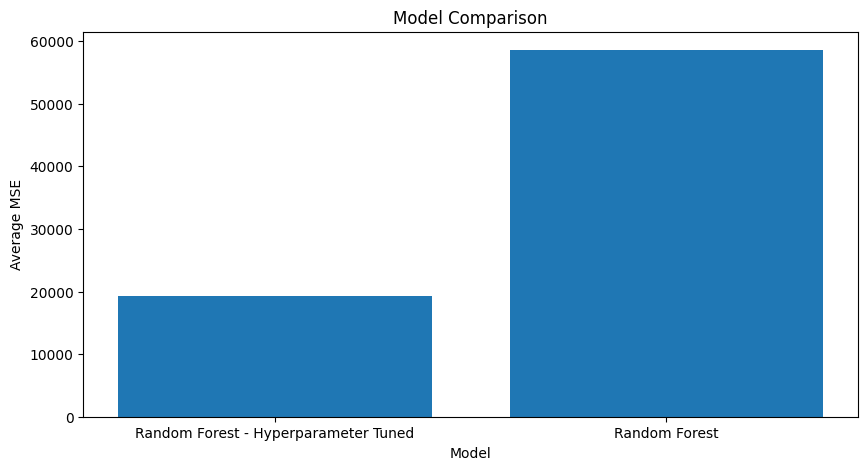

In [7]:
# Comparing the models

rf_min_pred = rf_min_model.predict(x_test)
rf_max_pred = rf_max_model.predict(x_test)
rf_modal_pred = rf_modal_model.predict(x_test)

rf_min_mse = mean_squared_error(y_test['Min'], rf_min_pred)
rf_max_mse = mean_squared_error(y_test['Max'], rf_max_pred)
rf_modal_mse = mean_squared_error(y_test['Modal'], rf_modal_pred)

rf_average_mse = (rf_min_mse + rf_max_mse + rf_modal_mse) / 3

print(f'Random Forest - Min MSE: {rf_min_mse}, Max MSE: {rf_max_mse}, Modal MSE: {rf_modal_mse}')
print(f'Random Forest - Average MSE: {rf_average_mse}')

# Model Comparison
plt.figure(figsize=(10, 5))
plt.bar(['Random Forest - Hyperparameter Tuned', 'Random Forest'], [rf_average_mse, average_mse_scores['Random Forest']])
plt.xlabel('Model')
plt.ylabel('Average MSE')
plt.title('Model Comparison')
plt.show()

We can see that there isn't much improvement in the performance of the model after hyperparameter tuning. We will now save the best model to make predictions on the test data.

## Saving the Training model for comparison with DL Models

In [8]:
import pickle

# Save the model
with open('ML_models/best_modal_model.pkl', 'wb') as f:
    pickle.dump(rf_modal_model, f)
with open('ML_models/best_min_model.pkl', 'wb') as f:
    pickle.dump(rf_min_model, f)
with open('ML_models/best_max_model.pkl', 'wb') as f:
    pickle.dump(rf_max_model, f)

## Training and Saving models for all Markets on Complete Dataset

In [9]:
markets = ['bengaluru', 'doddaballapur', 'hubballi', 'mysuru']

for market in markets:
    dataset = pd.read_csv(f'preprocessed_krama_report_{market}.csv')
    X = dataset.drop(['Min', 'Max', 'Modal'], axis=1)
    Y = dataset[['Min', 'Max', 'Modal']]
    
    rf_min_model = RandomForestRegressor(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'])
    rf_max_model = RandomForestRegressor(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'])
    rf_modal_model = RandomForestRegressor(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'])
    
    print(f'Training models for {market}...')
    print(f'Training Min Model...')
    rf_min_model.fit(X, Y['Min'])
    print(f'Training Max Model...')
    rf_max_model.fit(X, Y['Max'])
    print(f'Training Modal Model...')
    rf_modal_model.fit(X, Y['Modal'])
    
    pickle.dump(rf_min_model, open(f'ML_models/{market}/min_model.pkl', 'wb'))
    pickle.dump(rf_max_model, open(f'ML_models/{market}/max_model.pkl', 'wb'))
    pickle.dump(rf_modal_model, open(f'ML_models/{market}/modal_model.pkl', 'wb'))
    
    print(f'Models for {market} saved successfully!')

Training models for bengaluru...
Training Min Model...
Training Max Model...
Training Modal Model...
Models for bengaluru saved successfully!
Training models for doddaballapur...
Training Min Model...
Training Max Model...
Training Modal Model...
Models for doddaballapur saved successfully!
Training models for hubballi...
Training Min Model...
Training Max Model...
Training Modal Model...
Models for hubballi saved successfully!
Training models for mysuru...
Training Min Model...
Training Max Model...
Training Modal Model...
Models for mysuru saved successfully!
